In [72]:
#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '0'

from scipy import io
import numpy as np
import pycroscopy as px
import matplotlib.pyplot as plt
from os.path import join as pjoin
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential, Input, Model
from keras.layers import (Dense, Conv1D, Convolution2D, GRU, LSTM, Recurrent, Bidirectional, TimeDistributed,
                          Dropout, Flatten, RepeatVector, Reshape, MaxPooling1D, UpSampling1D, BatchNormalization)
from keras.layers.core import Lambda
from keras.optimizers import Adam
import os
from os.path import join as pjoin
from keras.regularizers import l1
import sys


% matplotlib inline
plt.style.use(pjoin(px.__path__[0],'josh_codes/custom.mplstyle'))

In [2]:
data = io.matlab.loadmat('./Data.mat')
voltage_mixed = data['Voltagedata_mixed']
volt = data['Voltagedata_mixed']

In [3]:
data['Loopdata_mixed'] = px.interpolate_missing_points(data['Loopdata_mixed'])

In [4]:
loop_data = data['Loopdata_mixed'].reshape(-1, 96)

In [5]:
loop_data.shape

(3600, 96)

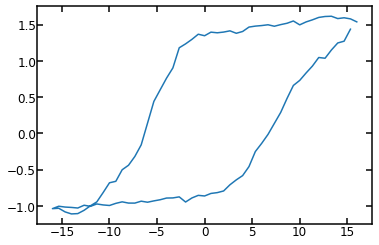

In [8]:
plt.plot(voltage_mixed, loop_data[600,:])

# Scales the data

In [7]:
loop_data -= np.mean(loop_data.reshape(-1))
loop_data /= np.std(loop_data)
loop_data = np.atleast_3d(loop_data)

In [9]:
def make_folder(folder_name, root='./'):

    folder = pjoin(root, '{}'.format(folder_name))
    os.makedirs(folder, exist_ok=True)

    return (folder)

In [14]:
drop_frac = 0.2

model = Sequential()

model.add(Bidirectional(LSTM(128, return_sequences=False, dropout=drop_frac),input_shape=(loop_data.shape[1], 1)))
model.add(Dense(16, activation='relu', name='encoding',activity_regularizer=l1(10e-6)))
model.add(RepeatVector(loop_data.shape[1]))
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=drop_frac),input_shape=(loop_data.shape[1], 1)))
model.add(TimeDistributed(Dense(1, activation='linear')))

model.compile(Adam(3e-5), loss='mse')

In [95]:
drop_frac = 0.2

model = Sequential()

model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=drop_frac),input_shape=(loop_data.shape[1], 1)))
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=drop_frac),input_shape=(loop_data.shape[1], 1)))
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=drop_frac),input_shape=(loop_data.shape[1], 1)))
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=drop_frac),input_shape=(loop_data.shape[1], 1)))
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=drop_frac),input_shape=(loop_data.shape[1], 1)))
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=drop_frac),input_shape=(loop_data.shape[1], 1)))
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=drop_frac),input_shape=(loop_data.shape[1], 1)))
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=drop_frac),input_shape=(loop_data.shape[1], 1)))
model.add(Bidirectional(LSTM(16, return_sequences=False, dropout=drop_frac),input_shape=(loop_data.shape[1], 1)))
model.add(Dense(16, activation='relu', name='encoding',activity_regularizer=l1(1e-6)))
model.add(RepeatVector(loop_data.shape[1]))
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=drop_frac),input_shape=(loop_data.shape[1], 1)))
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=drop_frac),input_shape=(loop_data.shape[1], 1)))
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=drop_frac),input_shape=(loop_data.shape[1], 1)))
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=drop_frac),input_shape=(loop_data.shape[1], 1)))
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=drop_frac),input_shape=(loop_data.shape[1], 1)))
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=drop_frac),input_shape=(loop_data.shape[1], 1)))
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=drop_frac),input_shape=(loop_data.shape[1], 1)))
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=drop_frac),input_shape=(loop_data.shape[1], 1)))
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=drop_frac),input_shape=(loop_data.shape[1], 1)))

model.add(TimeDistributed(Dense(1, activation='linear')))

model.compile(Adam(3e-5), loss='mse')

In [ ]:
Path = '16x10_16_16x10_10e6'
make_folder(Path)
tbCallBack = keras.callbacks.TensorBoard(
    log_dir='./' + Path, histogram_freq=0, write_graph=True, write_images=True)
filepath = './' + Path + '/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True,
                                             save_weights_only=False, mode='min', period=1)

model.fit(loop_data, loop_data, epochs=200000,
          batch_size=1200, validation_data=(loop_data, loop_data),
          callbacks=[tbCallBack, checkpoint])

Train on 3600 samples, validate on 3600 samples
Epoch 1/200000
3600/3600 [==============================] - 47s - loss: 1.0002 - val_loss: 0.9998
Epoch 2/200000
3600/3600 [==============================] - 32s - loss: 0.9997 - val_loss: 0.9994
Epoch 3/200000
3600/3600 [==============================] - 32s - loss: 0.9993 - val_loss: 0.9990
Epoch 4/200000
3600/3600 [==============================] - 32s - loss: 0.9989 - val_loss: 0.9986
Epoch 5/200000
3600/3600 [==============================] - 32s - loss: 0.9984 - val_loss: 0.9981
Epoch 6/200000
3600/3600 [==============================] - 32s - loss: 0.9980 - val_loss: 0.9976
Epoch 7/200000
3600/3600 [==============================] - 32s - loss: 0.9975 - val_loss: 0.9972
Epoch 8/200000
3600/3600 [==============================] - 32s - loss: 0.9970 - val_loss: 0.9966
Epoch 9/200000
3600/3600 [==============================] - 32s - loss: 0.9965 - val_loss: 0.9961
Epoch 10/200000
3600/3600 [==============================] - 32s - los

In [ ]:
Models.lo

In [86]:
model.save('./' + Path + '/end')

In [87]:
def get_ith_layer_output(model, X, i, mode='test'):
    ''' see https://keras.io/getting-started/faq/#keras-faq-frequently-asked-keras-questions'''
    get_ith_layer = keras.backend.function(
        [model.layers[0].input, keras.backend.learning_phase()], [model.layers[i].output])
    layer_output = get_ith_layer([X, 0 if mode=='test' else 1])[0]
    return layer_output

In [91]:
# preallocates the vector
out = np.zeros((3600, 16))
values = np.linspace(0, out.shape[0], 16 + 1).astype('int')


out = get_ith_layer_output(model, np.atleast_3d(loop_data),
                                                    5, mode='test').squeeze()

In [92]:
# saves the output of the embedding layer
np.save(Path + '/' + '_out',out)

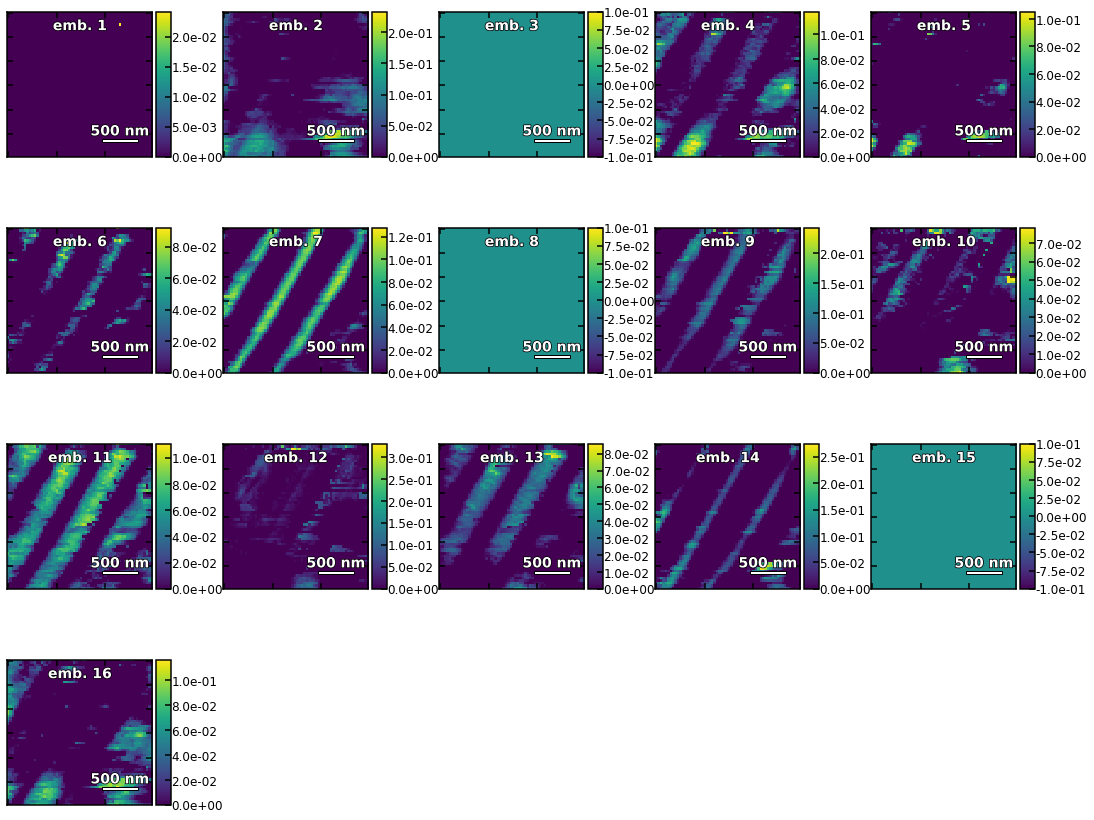

In [93]:
px.plot_embedding_maps(out[:,0:16],
                 add_scalebar=[2000,500],
                 filename='./embedding_maps_1',
                 print_PNG=True, num_of_plots=8)

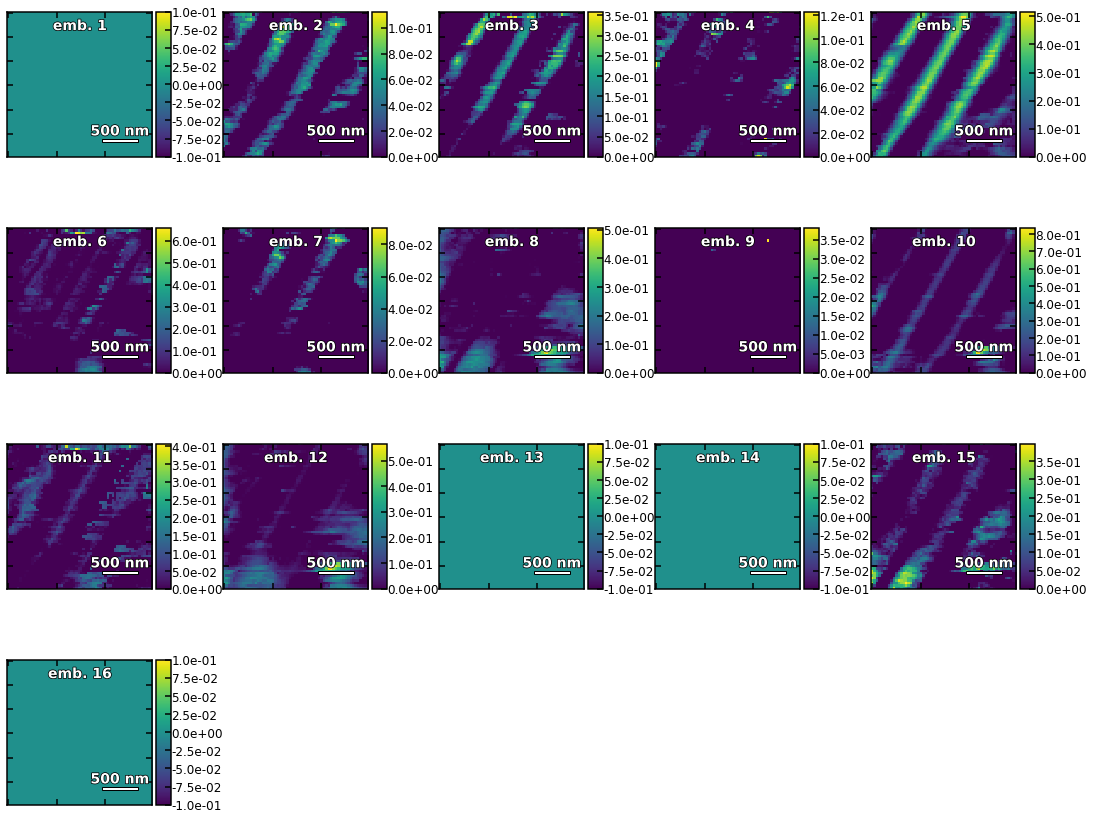

In [78]:
px.plot_embedding_maps(out[:,0:16],
                 add_scalebar=[2000,500],
                 filename='./embedding_maps_1',
                 print_PNG=True, num_of_plots=8)

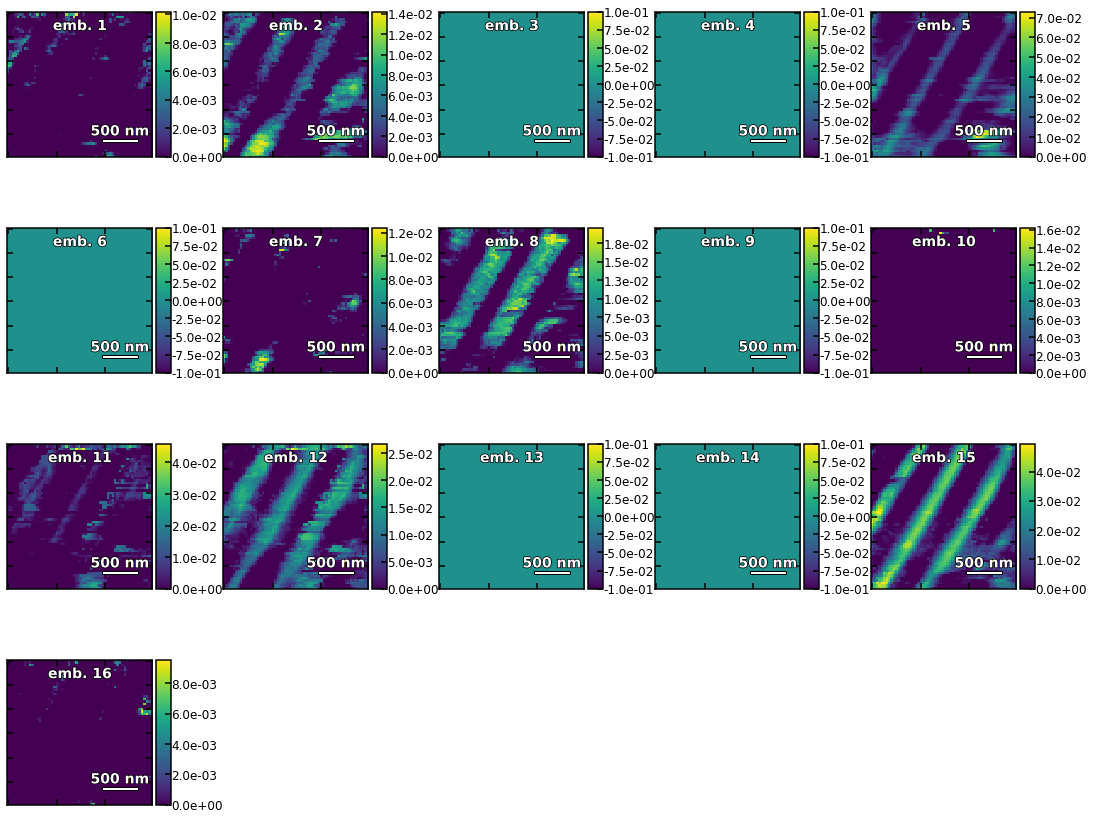

In [32]:
px.plot_embedding_maps(out[:,0:16],
                 add_scalebar=[2000,500],
                 filename='./embedding_maps_1',
                 print_PNG=True, num_of_plots=8)

In [35]:
# builds the identical encoding model
model_decode = Sequential()
model_decode.add(RepeatVector(96,input_shape=(16,)))
model_decode.add(Bidirectional(LSTM(128, return_sequences=True, dropout=.2)))
model_decode.add(TimeDistributed(Dense(1, activation='linear')))

In [36]:
# Sets the layers to match the training model
model_decode.layers[1].set_weights((model.layers[3].get_weights()))
model_decode.layers[2].set_weights((model.layers[4].get_weights()))

/home/josh/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/josh/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


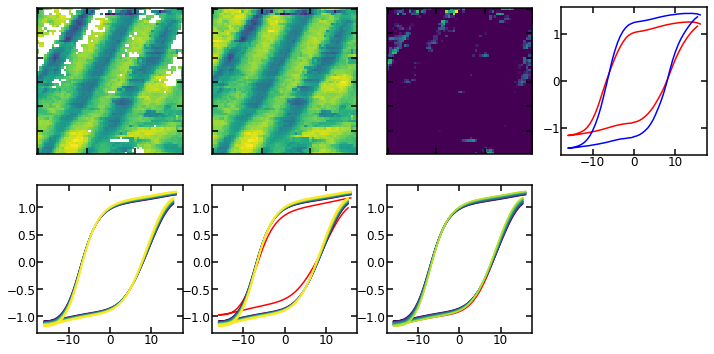

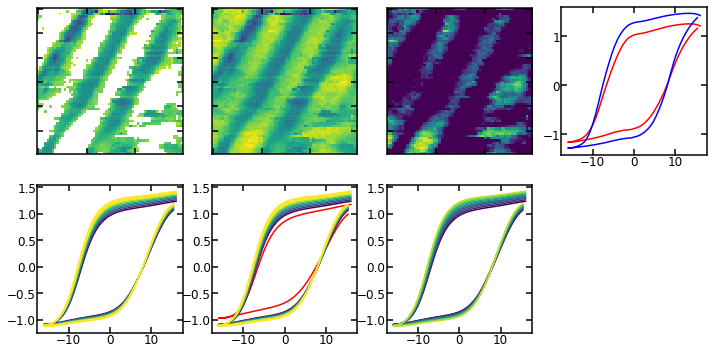

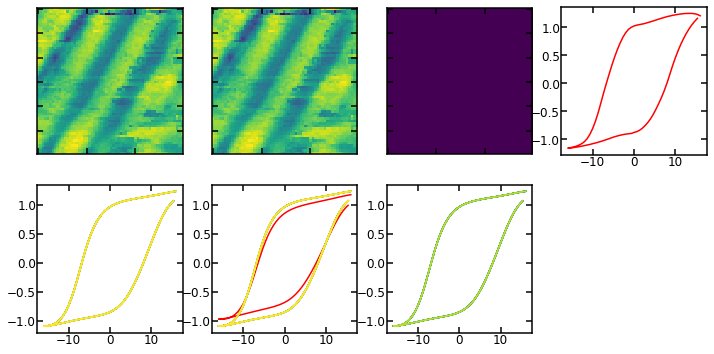

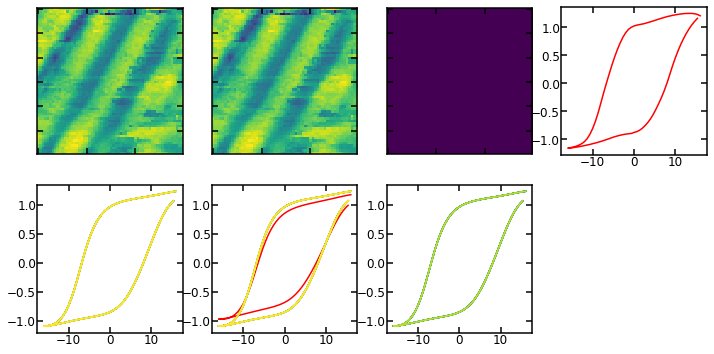

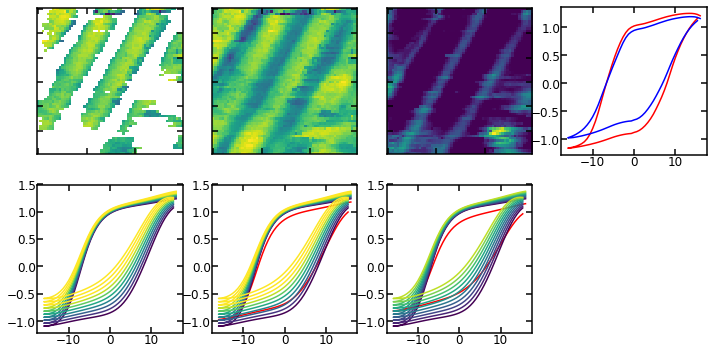

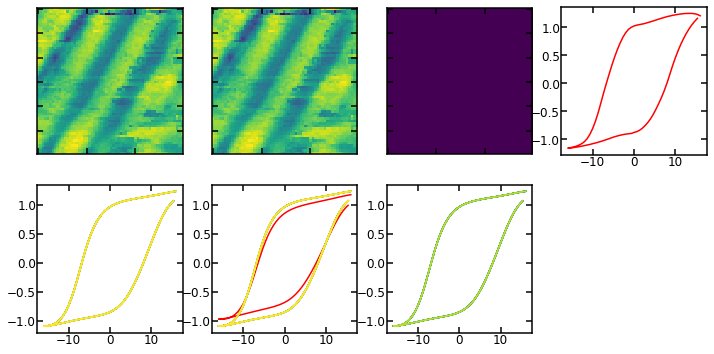

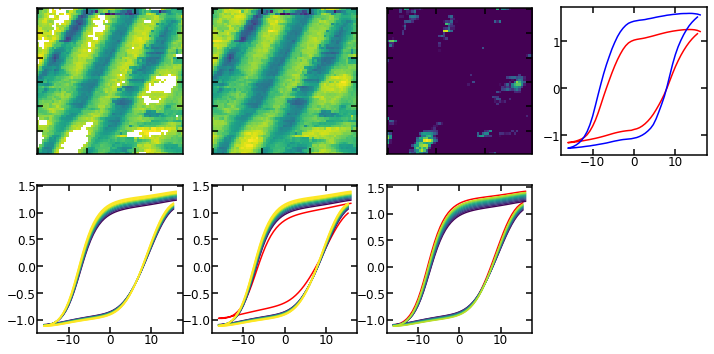

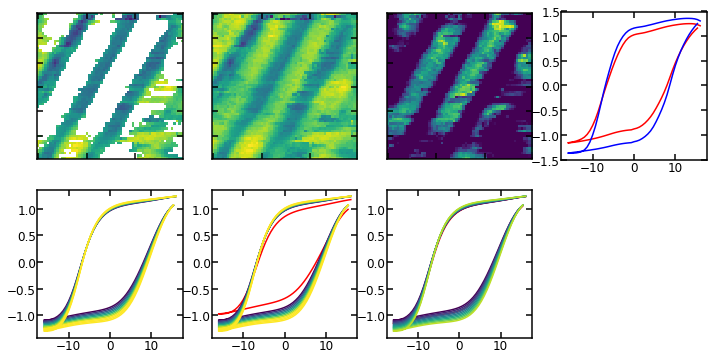

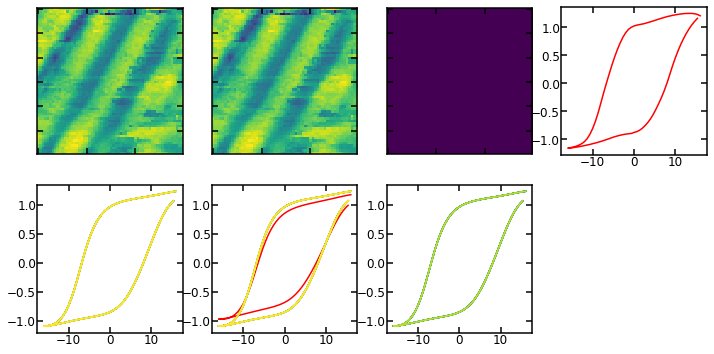

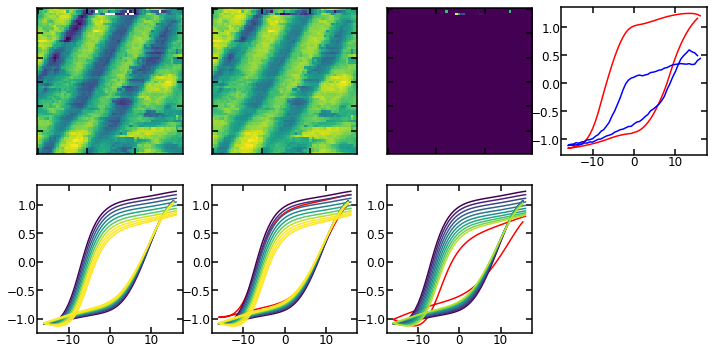

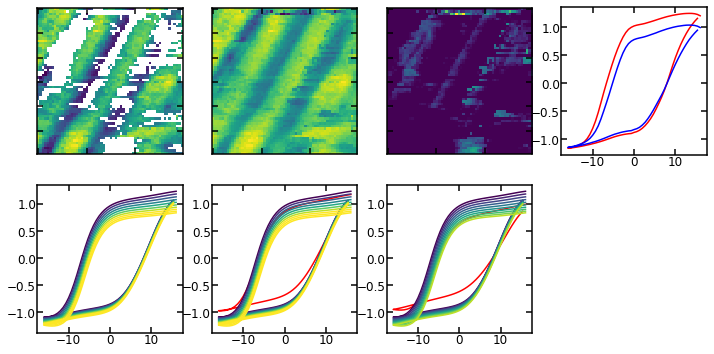

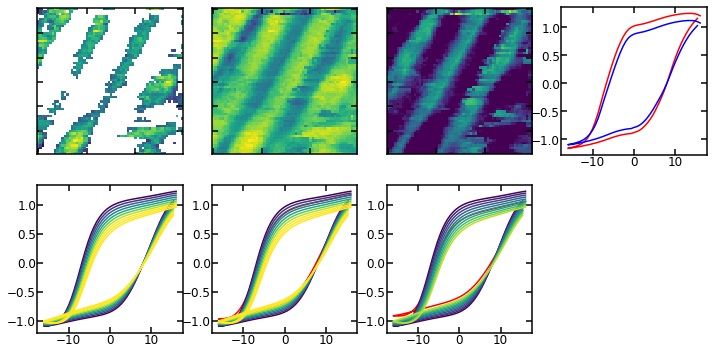

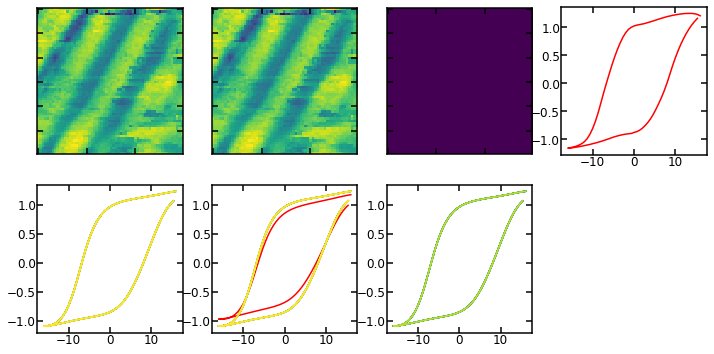

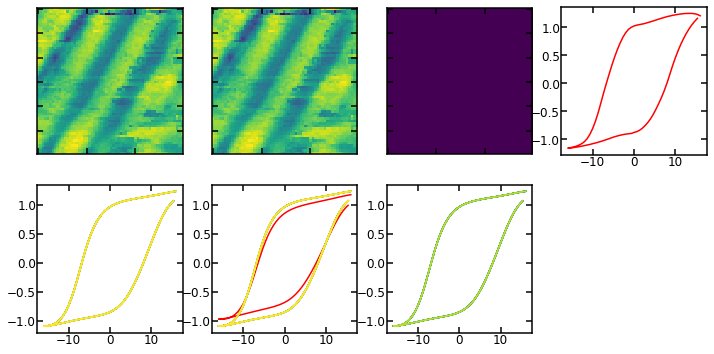

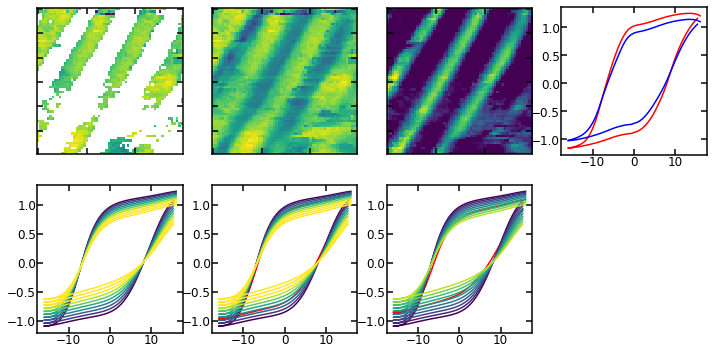

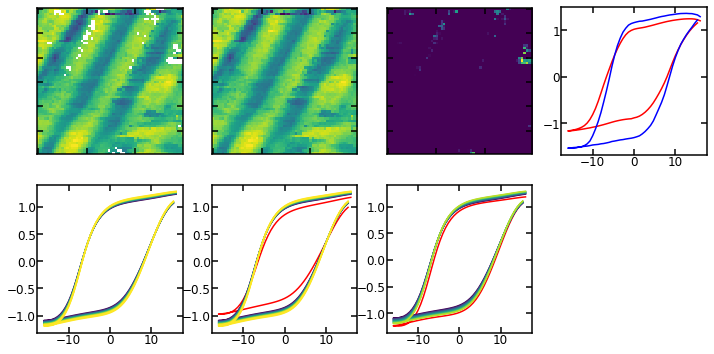

In [38]:
for i in range(16):
    
    # Defines the colorlist
    cmap = plt.get_cmap('viridis')

    # Builds the graph structure
    fig, ax = px.layout_graphs_of_arb_number(7)

    # shows the regions activated
    dat_hold = np.copy(data['Loopdata_mixed'][:,:,10]).reshape(-1)
    dat_hold[np.where(out[:,i] > 0)] = np.nan

    # plots the region activated
    ax[0].imshow(dat_hold.reshape(60,60))
    ax[0].set_yticklabels('')
    ax[0].set_xticklabels('')

    # shows the regions activated
    dat_hold = np.copy(data['Loopdata_mixed'][:,:,10]).reshape(-1)
    dat_hold[np.where(out[:,i] > 0)] = np.nan
    
    # plots the region activated
    ax[1].imshow(data['Loopdata_mixed'][:,:,10])
    ax[1].set_yticklabels('')
    ax[1].set_xticklabels('')
    
    # plots the activation map
    ax[2].imshow(out[:,i].reshape(60,60))
    ax[2].set_yticklabels('')
    ax[2].set_xticklabels('')

    # Plot the average and selected loops
    ax[3].plot(volt, np.average(loop_data.squeeze(),axis=0),'r')
    ax[3].plot(volt, np.average(loop_data[out[:,i] > 0].squeeze(),axis=0),'b')

    # all zero except value
    values = np.zeros((10,16))
    values[:,i] = np.linspace(0,np.max(out[:,i]),10)
    generated = model_decode.predict(np.atleast_2d(values)).squeeze()
    for j in range(10):
        ax[4].plot(volt, generated[j,:], color = cmap(.15*j))

    ax[5].plot(volt, model_decode.predict(np.atleast_2d(np.average(out,axis=0))).squeeze(),'r')
    value = np.tile(np.average(out,axis=0),(10,1))
    generated = model_decode.predict(np.atleast_2d(values)).squeeze()
    for j in range(10):
        ax[5].plot(volt, generated[j,:], color = cmap(.15*j))

    ax[6].plot(volt, model_decode.predict(np.atleast_2d(np.average(out[np.where(out[:,i] > 0)],axis=0))).squeeze(),'r')
    value = np.tile(np.average(out[np.where(out[:,i] > 0)],axis=0),(10,1))
    generated = model_decode.predict(np.atleast_2d(values)).squeeze()
    for j in range(10):
        ax[6].plot(volt, generated[j,:], color = cmap(.1*j))

    px.savefig(f'Embedding_loops_{i}', print_PNG=True)

/home/josh/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/josh/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


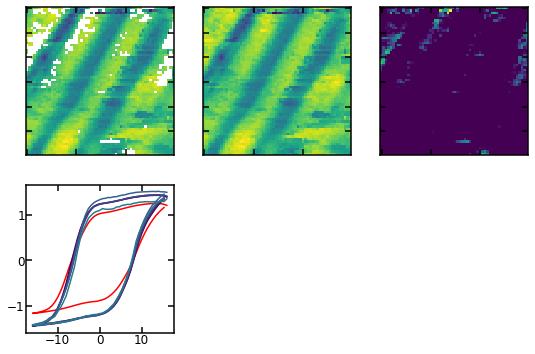

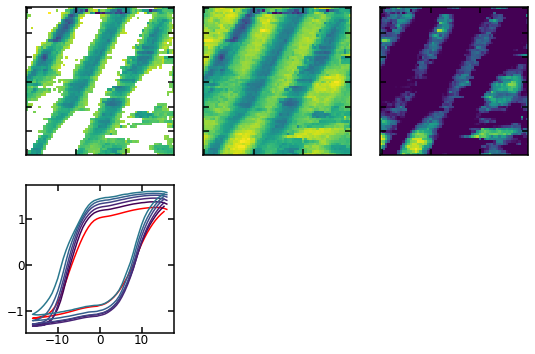

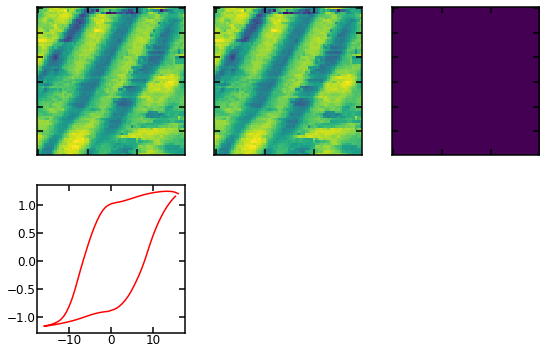

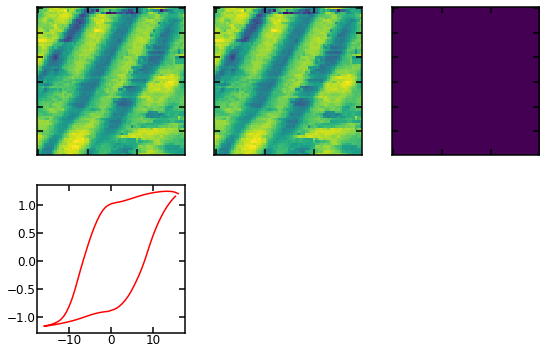

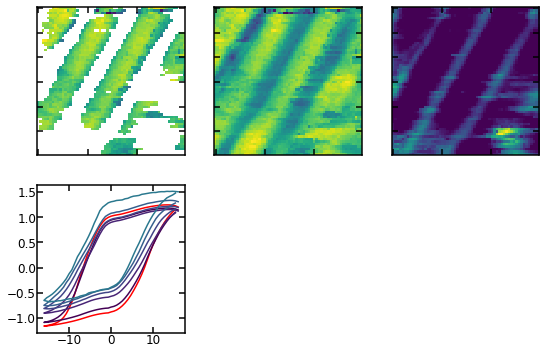

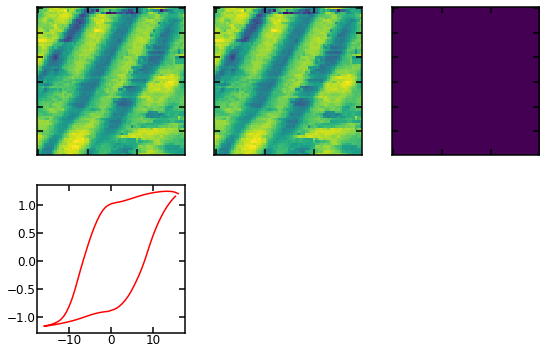

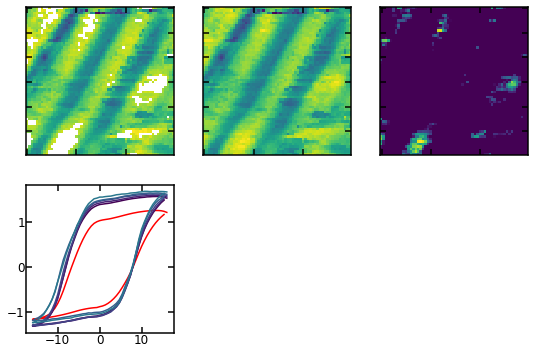

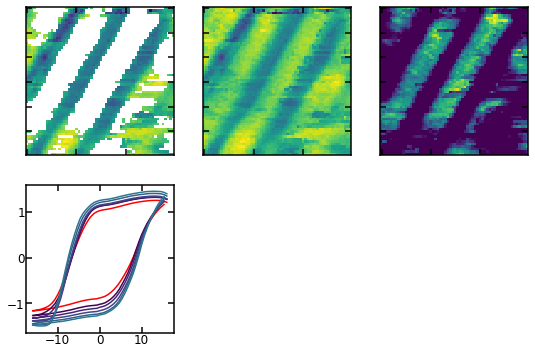

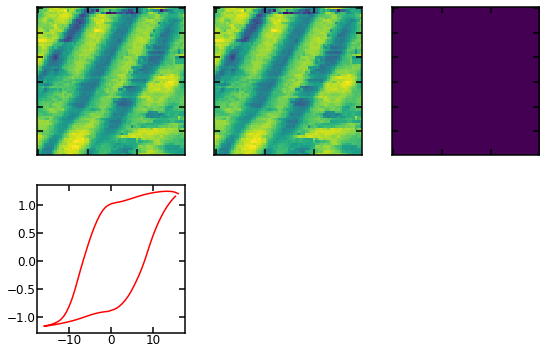

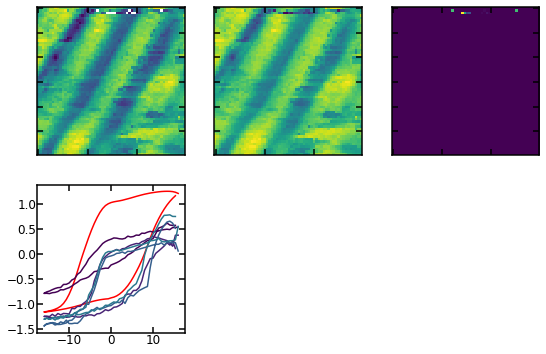

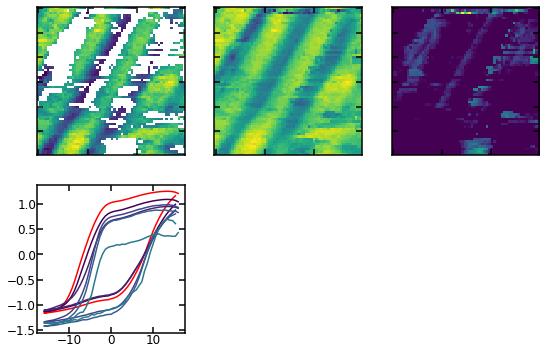

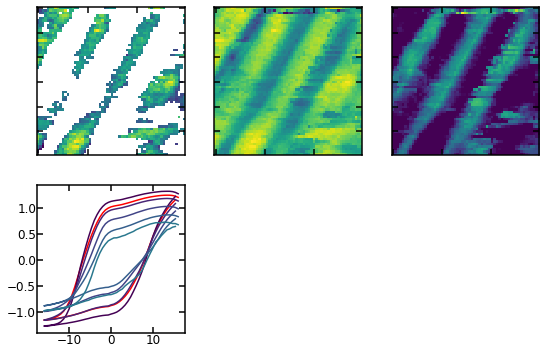

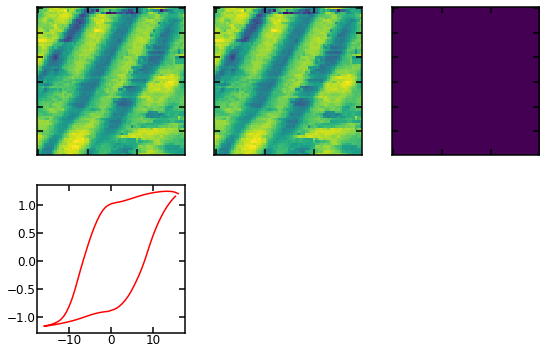

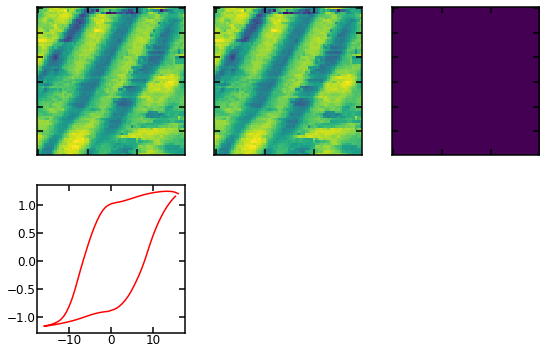

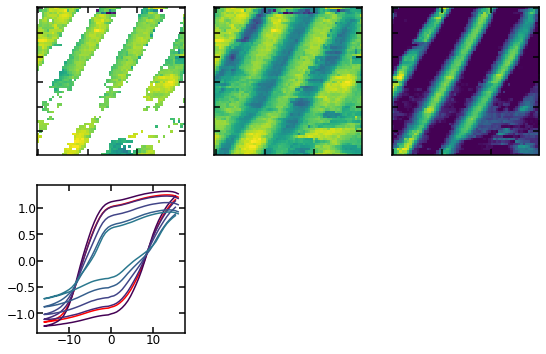

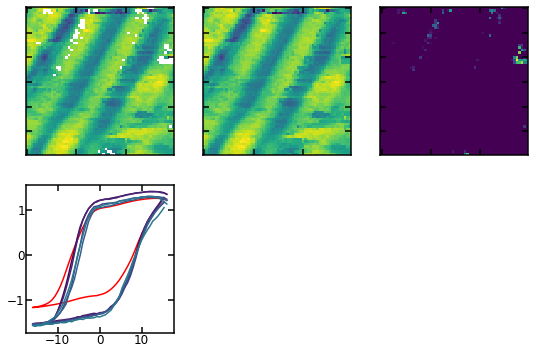

In [61]:
for i in range(16):

    # Defines the colorlist
    cmap = plt.get_cmap('viridis')

    # Builds the graph structure
    fig, ax = px.layout_graphs_of_arb_number(4)

    # shows the regions activated
    dat_hold = np.copy(data['Loopdata_mixed'][:, :, 10]).reshape(-1)
    dat_hold[np.where(out[:, i] > 0)] = np.nan

    # plots the region activated
    ax[0].imshow(dat_hold.reshape(60, 60))
    ax[0].set_yticklabels('')
    ax[0].set_xticklabels('')

    # shows the regions activated
    dat_hold = np.copy(data['Loopdata_mixed'][:, :, 10]).reshape(-1)
    dat_hold[np.where(out[:, i] > 0)] = np.nan

    # plots the region activated
    ax[1].imshow(data['Loopdata_mixed'][:, :, 10])
    ax[1].set_yticklabels('')
    ax[1].set_xticklabels('')

    # plots the activation map
    ax[2].imshow(out[:, i].reshape(60, 60))
    ax[2].set_yticklabels('')
    ax[2].set_xticklabels('')

    # Plot the average and selected loops
    ax[3].plot(volt, np.average(loop_data.squeeze(), axis=0), 'r')

    hist, bins = np.histogram(out[:, i], 6)

    for j in range(5):
        idx = np.where((out[:, i] > bins[j]) * (out[:, i] < bins[j + 1]))

        # Plot the average and selected loops
        ax[3].plot(volt, np.average(np.atleast_2d(
            loop_data[idx].squeeze()), axis=0), color=cmap(.1 * j))

In [59]:
loop_data[idx].squeeze().shape

(96,)

In [57]:
idx

(array([1377]),)

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [ ]:
scaled_loop_data[np.where(out[:,i] > 0)].shape

In [ ]:
plt.plot(volt, np.average(scaled_loop_data.squeeze(),axis=0),'b')

In [ ]:
.shape

In [ ]:
plt.plot(volt,np.average(loop_data, axis=0))

In [ ]:
plt.plot(volt,np.average(scaled_loop_data, axis=0))

In [ ]:
inputs = Input(shape=(loop_data.shape[1],1))#################################

LSTM_encode = Bidirectional(LSTM(128, return_sequences=False))(inputs)

D1 = Dense(1, activation='relu',activity_regularizer=l1(10e-6))(LSTM_encode)
D2 = Dense(1, activation='relu',activity_regularizer=l1(10e-6))(LSTM_encode)

D1_1 = Dense(1, activation='relu',activity_regularizer=l1(10e-6))(D1)
D1_2 = Dense(1, activation='relu',activity_regularizer=l1(10e-6))(D1)
#
D2_1 = Dense(1, activation='relu',activity_regularizer=l1(10e-6))(D2)
D2_2 = Dense(1, activation='relu',activity_regularizer=l1(10e-6))(D2)
#
D1_1_1 = Dense(1, activation='relu',activity_regularizer=l1(10e-6))(D1_1)
D1_1_2 = Dense(1, activation='relu',activity_regularizer=l1(10e-6))(D1_1)
#
D1_2_1 = Dense(1, activation='relu',activity_regularizer=l1(10e-6))(D1_2)
D1_2_2 = Dense(1, activation='relu',activity_regularizer=l1(10e-6))(D1_2)
#
D2_1_1 = Dense(1, activation='relu',activity_regularizer=l1(10e-6))(D2_1)
D2_1_2 = Dense(1, activation='relu',activity_regularizer=l1(10e-6))(D2_1)
#
D2_2_1 = Dense(1, activation='relu',activity_regularizer=l1(10e-6))(D2_2)
D2_2_2 = Dense(1, activation='relu',activity_regularizer=l1(10e-6))(D2_2)

#x = keras.layers.concatenate([D1,D2])
x = keras.layers.concatenate([D1_1_1, D1_1_2, D1_2_1, D1_2_2, D2_1_1, D2_1_2, D2_2_1, D2_2_2])
x = RepeatVector(loop_data.shape[1])(x)
x = Bidirectional(LSTM(128, return_sequences=True))(x)
outputs = TimeDistributed(Dense(1, activation='linear'))(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=Adam(3e-5),loss='mse')#

In [83]:
from keras.utils import plot_model
plot_model(model, to_file= 'model.png')

In [ ]:
Path = '128_8c_128_10e6_v2'
make_folder(Path)
tbCallBack = keras.callbacks.TensorBoard(
    log_dir='./' + Path, histogram_freq=0, write_graph=True, write_images=True)
filepath = './' + Path + '/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True,
                                             save_weights_only=False, mode='min', period=1)

model.fit(loop_data, loop_data, epochs=20000,
          batch_size=3600, validation_data=(loop_data, loop_data),
          callbacks=[tbCallBack, checkpoint])


In [81]:
Path

'64x3_16_64x3_10e6_V1'

In [ ]:
from keras import backend as K

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functor = K.function([inp]+ [K.learning_phase()], outputs ) # evaluation function



In [ ]:
def get_activations(model, model_inputs, print_shape_only=False, layer_name=None):
    print('----- activations -----')
    activations = []
    inp = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        # only one input! let's wrap it in a list.
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  # all layer outputs

    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(0.)
    else:
        list_inputs = [model_inputs, 0.]

    # Learning phase. 0 = Test mode (no dropout or batch normalization)
    # layer_outputs = [func([model_inputs, 0.])[0] for func in funcs]
    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations


In [ ]:
activations = get_activations(model,loop_data)

In [ ]:
plt.imshow(activations[2][:,0].reshape(60,60))

In [ ]:
plt.imshow(activations[3][:,0].reshape(60,60))

In [ ]:
plt.imshow(activations[4][:,0].reshape(60,60))

In [ ]:
plt.imshow(activations[5][:,0].reshape(60,60))

In [ ]:
plt.imshow(activations[6][:,0].reshape(60,60))

In [ ]:
plt.imshow(activations[7][:,0].reshape(60,60))

In [ ]:
plt.imshow(activations[8][:,0].reshape(60,60))

In [ ]:
for i in activations:
    print(i.shape)

In [ ]:
plt.imshow(activations[2].reshape(60,60)==0)

In [ ]:
np.sum(activations[3])

In [ ]:
model2 = keras.models.load_model('./128_16e_128_10e6/weights.879-0.17.hdf5')

In [ ]:
model2.summary()

In [ ]:
out2 = np.load('./128_16e_128_10e6/_out.npy')

In [ ]:
# preallocates the vector
out = np.zeros((3600, 16))
values = np.linspace(0, out.shape[0], 16 + 1).astype('int')


out = get_ith_layer_output(model2, np.atleast_3d(loop_data),
                                                    1, mode='test').squeeze()